<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/PraktikumMandiri04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# menghubungan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Colab Notebooks/praktikum_ml/praktikum04"

In [ ]:
# 1. Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 2. Baca dataset Calon Pembeli Mobil
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum04/data/calonpembelimobil.csv', sep=',')

# Lihat 5 baris pertama
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
# 3. Pilih fitur (X) dan target (y)
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

# Cek ukuran data
print("Ukuran X:", X.shape)
print("Ukuran y:", y.shape)

Ukuran X: (1000, 5)
Ukuran y: (1000,)


In [ ]:
# 4. Bagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 700
Jumlah data uji: 300


In [ ]:
# 5. Buat model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 6. Prediksi hasil pada data uji
y_pred = model.predict(X_test)

# Tampilkan 10 hasil pertama
print("Prediksi:", y_pred[:10])

Prediksi: [1 1 0 1 1 1 0 0 1 1]


In [ ]:
# 7. Evaluasi performa model
print("Akurasi model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi model: 0.93

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        99
           1       0.95      0.95      0.95       201

    accuracy                           0.93       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.93      0.93       300



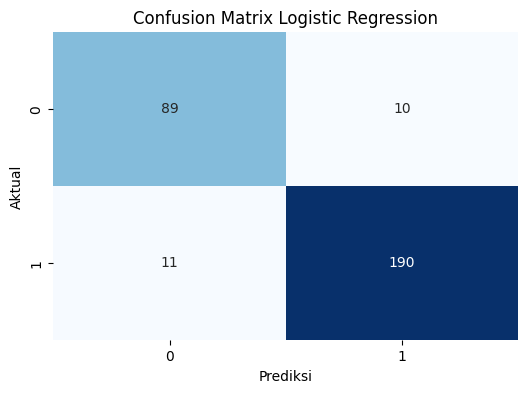

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 7a. Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 7b. Visualisasikan confusion matrix sebagai heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# 8. Gunakan dataset baru untuk menguji model
data_baru = pd.DataFrame({
    'Usia': [30, 50],
    'Status': [1, 2],
    'Kelamin': [0, 1],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [200, 300]
})

# Prediksi hasil pembelian mobil
prediksi_baru = model.predict(data_baru)
print("\nPrediksi data baru:")
print(prediksi_baru)


Prediksi data baru:
[0 1]


/tmp/ipython-input-2117243569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='Set2')


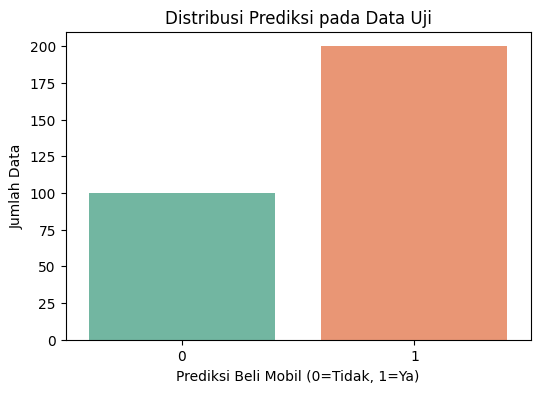

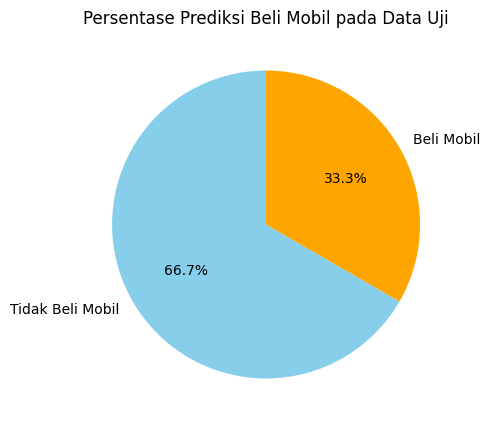

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Visualisasi hasil prediksi pada data uji ---
plt.figure(figsize=(6,4))
sns.countplot(x=y_pred, palette='Set2')
plt.title('Distribusi Prediksi pada Data Uji')
plt.xlabel('Prediksi Beli Mobil (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Data')
plt.show()

# --- Pie chart hasil prediksi ---
pred_count = pd.Series(y_pred).value_counts()

plt.figure(figsize=(5,5))
plt.pie(pred_count, labels=['Tidak Beli Mobil', 'Beli Mobil'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue','orange'])
plt.title('Persentase Prediksi Beli Mobil pada Data Uji')
plt.show()

Data baru dengan hasil prediksi:
   Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Prediksi_BeliMobil
0    30       1        0               0          200                   0
1    50       2        1               1          300                   1


/tmp/ipython-input-4132564300.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Data 1', 'Data 2'], y=prediksi_baru, palette='coolwarm')


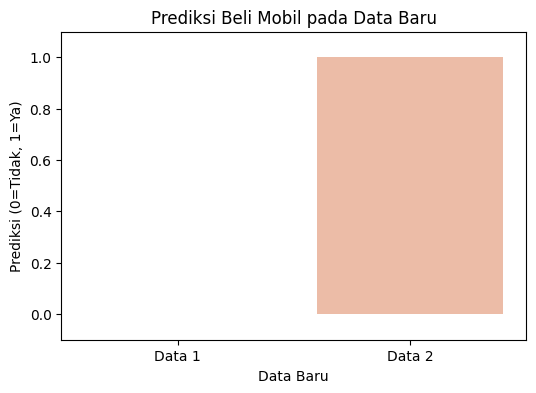

In [ ]:
# Prediksi data baru
prediksi_baru = model.predict(data_baru)

# Gabungkan dengan data input
hasil_baru = data_baru.copy()
hasil_baru['Prediksi_BeliMobil'] = prediksi_baru
print("Data baru dengan hasil prediksi:")
print(hasil_baru)

# --- Visualisasi prediksi data baru ---
plt.figure(figsize=(6,4))
sns.barplot(x=['Data 1', 'Data 2'], y=prediksi_baru, palette='coolwarm')
plt.title('Prediksi Beli Mobil pada Data Baru')
plt.ylabel('Prediksi (0=Tidak, 1=Ya)')
plt.xlabel('Data Baru')
plt.ylim(-0.1, 1.1)
plt.show()